## Bi-Weekly Monitoring

## Looking at diarrhea and WG use in the Bi-Weekly Monitoring Study

The following lab is an intro to a new dataset, that we havent seen yet:
A subset of households was followed from the Main Rural Water Project Spring Protection Study, but to be followed more closely for disease prevalence measurement, by visiting bi-weekly or every two weeks. This would bring the study in line with accepted Epidemiology methods of high-frequency observation.   The study is called BWM for bi-weekly monitoring.

** there are two tables:**
- Child level data 
- Household Data

*** (we have already looked at the Water quality for the BWM study but have not looked at the household or child data) ***

In [ ]:
# run this cell - obligatory imports in every file
from datascience import *
import pandas as pd
from pandas import read_stata
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

In [ ]:
#find the right directory  - this will be different on class Jupyter
#ls
#cd /Data8
%pwd
%cd ~/Data8/LS88-BTC

In [ ]:
# read in stata data set using pandas ( pd) 
BWM_child = pd.DataFrame(pd.read_stata('BWM_child_EVDvars_Data8.dta'))
BWM_child_table= Table.from_df(BWM_child)

In [ ]:
# To look at the full table if needed 
#BWM_child_table

In [ ]:
# The reason that I list the variables is to look through the variables that I have 
# and  I can copy and paste variable names into new commands
#list(BWM_child_table)

In [ ]:
# Survey visits were every two weeks over 18 weeks
# Show the Child-Observations per round
BWM_child_table.group('bwm_round').show()
# Note the last two rounds lableled 99 and 161

In [ ]:
# The key variable to look at is the 7 day recall variable for diarrhea in the past week
# 7 day diarrhea - categorical variable ( 0-1) for each child
BWM_child_table.group('d6a1_7dd_n')

In [ ]:
612/7170

In [ ]:
# We will dig into this more later, but there are two extra samples - called "extension households"
# these are the rounds labeled 99 and 161
# We will consider the non-extensition households/child observations to be the Main BWM
# 7 day diarrhea - categorical variable ( 0-1) for each child
# Excluding the 2 extension rounds
BWM_child_table.where("bwm_round", are.below(20)).group('d6a1_7dd_n')

In [ ]:
526/6525

In [ ]:
#  Lets examie this with a pivot by survey round
# The story we want to tell is already here.. 
BWM_child_table.pivot('bwm_round','d6a1_7dd_n')

In [ ]:
# Making a smaller sub-table with our diarrhea variable of interest
BWM_Main_Diarrhea = BWM_child_table.select('bwm_round','d6a1_7dd_n').where('bwm_round', are.below(20))
BWM_Main_Diarrhea

In [ ]:
# We can make a set of means like in Lab6
BWM_Main_Diarrhea_Means = BWM_Main_Diarrhea.group('bwm_round',np.mean)

In [ ]:
BWM_Main_Diarrhea_Means.plot('bwm_round')

** Question 1**

Please 1) describe the graph above carefully  - using your words to describe the x and y axis. 2) Describe the trend in the picture 3) give some possible reasons for the trend 4) describe what other things we could look at with the existing dataset  

Please write here

In [ ]:
# This is an interesting pattern - we can look at other diseases to see if they follow this pattern
# Lets look at Cough - again this is 7 day recall 
BWM_Main_Cough = BWM_child_table.select('bwm_round','d6d1_7dc_n').where('bwm_round', are.below(20))
BWM_Main_Cough_Means = BWM_Main_Cough.group('bwm_round',np.mean)
BWM_Main_Cough
BWM_Main_Cough_Means.plot('bwm_round')

In [ ]:
# Making a small sub-table for another disease 
# Lets look at Chest Noise  - again 7 day recall
#d7d2_num_chest_noise
BWM_Main_ChestNoise = BWM_child_table.select('bwm_round','d7d2_7dcn_n').where('bwm_round', are.below(20))
BWM_Main_ChestNoise_Means = BWM_Main_ChestNoise.group('bwm_round',np.mean)
#BWM_Main_ChestNoise
BWM_Main_ChestNoise_Means.plot('bwm_round')


*** Question 2 ***
Redo these graphs for two more diseases

1) 'd6b_7day_fever' and 'd6c_7day_vomiting' are the raw variables coded 1-2
2) 'd6b_7day_fever_n' and 'd6c_7day_vomiting_n' are transformed variables coded 0-1

**write a short paragraph describing what you find in these graphs

In [ ]:
# code fever here

In [ ]:
# code vomiting here

**Write comments on these graphs here

In [ ]:
# Now lets start to work with the data for the extension rounds
BWM_Extension_Diarrhea= BWM_child_table.select('bwm_round','d6a1_7dd_n').where('bwm_round', are.above(20))
BWM_Extension_Diarrhea

In [ ]:
# Here is the 7 day prevalence for the Extension Rounds
BWM_Extension_Diarrhea_Means = BWM_Extension_Diarrhea.group('bwm_round',np.mean)
BWM_ExtMeans_Relabeled = BWM_Extension_Diarrhea_Means.select('d6a1_7dd_n mean')
BWM_ExtMeans_Relabeled = BWM_ExtMeans_Relabeled.with_column('bwm_round',[9,16])
BWM_ExtMeans_Relabeled

In [ ]:
#  Here is the two sets graphed
# Need to figure out how to get these onto the same graph
BWM_Main_Diarrhea_Means.plot('bwm_round')
BWM_ExtMeans_Relabeled.scatter('bwm_round')

** Extra Credit Coding challenge  - how to plot Main and Extension on the same graph?

In [219]:
# Now lets turn to the household Dataset
# Read in Dataset for Households
# This file is a bit large 
BWM_Household = pd.DataFrame(pd.read_stata('BWM_HH_EVDvars_Data8.dta'))
BWM_Household_table= Table.from_df(BWM_Household)
BWM_Household_table

quiz_id | bwm_round | a1_hh_id | a2_spring_id | interview_date      | a5_date_interview_day | a5_date_interview_month | a5_date_interview_year | a8_data_entry_id | a9_data_entry_comments | b1_1_walk_min | b1_1a_protected | b1_2_ksh_250 | b1_3_ksh_500 | b1_4_ksh_750 | b1_5_ksh_1000 | b1_6_ksh_1500 | b1_7_ksh_2000 | b1_8_min_2 | b1_9_min_5 | b1_10_min_10 | b1_11_min_15 | b1_12_min_20 | b1_13_min_30 | b1_gender | b2_relation_youngest_child | b3_birth_year | b4_spouse_birth_year | b5_tribe | b6_tribe_other | b7_tribe_spouse | b8_tribe_spouse_other | b9_education | b10_spouse_education | b11_occupation1 | b11_occupation2 | b11_occupation3 | b12_1spouse_occupation | b12_2spouse_occupation | b12_3spouse_occupation | b13_religion | b2_a1_hh_id | b2_a2_know_person | b2_a3_know_how | b2_a3_know_how_desc | b2_a5_talk_frequency | b2_a6_treat_water | b2_a6b_receive_wg | b2_a9_spoken_water_guard | b2_a10_children_health_problem | b2_b1_hh_id | b2_b2_know_person | b2_b3_know_how | b2_b3_know_how_desc | b2_b5_talk_frequency | b2_b6_treat_water | b2_b6b_receive_wg | b2_b9_spoken_water_guard | b2_b10_children_health_problem | b2_c1_hh_id | b2_c2_know_person | b2_c3_know_how | b2_c3_know_how_desc | b2_c5_talk_frequency | b2_c6_treat_water | b2_c6b_receive_wg | b2_c9_spoken_water_guard | b2_c10_children_health_problem | b2_d1_hh_id | b2_d2_know_person | b2_d3_know_how | b2_d3_know_how_desc | b2_d5_talk_frequency | b2_d6_treat_water | b2_d6b_receive_wg | b2_d9_spoken_water_guard | b2_d10_children_health_problem | b2_e1_hh_id | b2_e2_know_person | b2_e3_know_how | b2_e3_know_how_desc | b2_e5_talk_frequency | b2_e6_treat_water | b2_e6b_receive_wg | b2_e9_spoken_water_guard | b2_e10_children_health_problem | c1_num_kids_under_5 | c2_residents | c3_born_under5 | order_c01 | order_c02 | order_c03 | order_c04 | order_c05 | order_c06 | order_c07 | order_c08 | order_c09 | order_c10 | order_c11 | order_c12 | order_c13 | order_c14 | order_c15 | order_c16 | order_c17 | order_c18 | order_c19 | order_c20 | order_c21 | order_c22 | c3_1_child_id01 | c3_1_child_id02 | c3_1_child_id03 | c3_1_child_id04 | c3_1_child_id05 | c3_1_child_id06 | c3_1_child_id07 | c3_1_child_id08 | c3_1_child_id09 | c3_1_child_id10 | c3_1_child_id11 | c3_1_child_id12 | c3_1_child_id13 | c3_1_child_id14 | c3_1_child_id15 | c3_1_child_id16 | c3_1_child_id17 | c3_1_child_id18 | c3_1_child_id19 | c3_1_child_id20 | c3_1_child_id21 | c3_1_child_id22 | c3_3_gender01 | c3_3_gender02 | c3_3_gender03 | c3_3_gender04 | c3_3_gender05 | c3_3_gender06 | c3_3_gender07 | c3_3_gender08 | c3_3_gender09 | c3_3_gender10 | c3_3_gender11 | c3_3_gender12 | c3_3_gender13 | c3_3_gender14 | c3_3_gender15 | c3_3_gender16 | c3_3_gender17 | c3_3_gender18 | c3_3_gender19 | c3_3_gender20 | c3_3_gender21 | c3_3_gender22 | c3_4_doa_day01 | c3_4_doa_day02 | c3_4_doa_day03 | c3_4_doa_day04 | c3_4_doa_day05 | c3_4_doa_day06 | c3_4_doa_day07 | c3_4_doa_day08 | c3_4_doa_day09 | c3_4_doa_day10 | c3_4_doa_day11 | c3_4_doa_day12 | c3_4_doa_day13 | c3_4_doa_day14 | c3_4_doa_day15 | c3_4_doa_day16 | c3_4_doa_day17 | c3_4_doa_day18 | c3_4_doa_day19 | c3_4_doa_day20 | c3_4_doa_day21 | c3_4_doa_day22 | c3_4_doa_month01 | c3_4_doa_month02 | c3_4_doa_month03 | c3_4_doa_month04 | c3_4_doa_month05 | c3_4_doa_month06 | c3_4_doa_month07 | c3_4_doa_month08 | c3_4_doa_month09 | c3_4_doa_month10 | c3_4_doa_month11 | c3_4_doa_month12 | c3_4_doa_month13 | c3_4_doa_month14 | c3_4_doa_month15 | c3_4_doa_month16 | c3_4_doa_month17 | c3_4_doa_month18 | c3_4_doa_month19 | c3_4_doa_month20 | c3_4_doa_month21 | c3_4_doa_month22 | c3_4_doa_year01 | c3_4_doa_year02 | c3_4_doa_year03 | c3_4_doa_year04 | c3_4_doa_year05 | c3_4_doa_year06 | c3_4_doa_year07 | c3_4_doa_year08 | c3_4_doa_year09 | c3_4_doa_year10 | c3_4_doa_year11 | c3_4_doa_year12 | c3_4_doa_year13 | c3_4_doa_year14 | c3_4_doa_year15 | c3_4_doa_year16 | c3_4_doa_year17 | c3_4_doa_year18 | c3_4_doa_year19 | c3_4_doa_year20 | c3_4_doa_year21 | c3_4_doa_year22 | c3_5_dob_day01 | c3_5_dob_day02 

In [220]:
BWM_Household_table.group('bwm_round').show()

bwm_round,count
1,156
2,153
3,151
4,153
5,162
6,156
7,163
8,154
9,154
10,162


In [221]:
# Making a small sub-table for Main study household
# Using the Validated Water Guard use - which is called G5XH5 in this dataset
BWM_Main_WG_Use = BWM_Household_table.select('bwm_round','G5XH5').where('bwm_round', are.below(20))
BWM_Main_WG_Use

bwm_round,G5XH5
1,1
1,1
1,0
1,0
1,0
1,0
1,0
1,0
1,1
1,0


In [222]:
# making means of WG use by round
BWM_Main_WG_Means=BWM_Main_WG_Use.group('bwm_round',np.mean) 
BWM_Main_WG_Means

bwm_round,G5XH5 mean
1,0.192308
2,0.196078
3,0.291391
4,0.281046
5,0.265432
6,0.314103
7,0.269939
8,0.285714
9,0.292208
10,0.253086


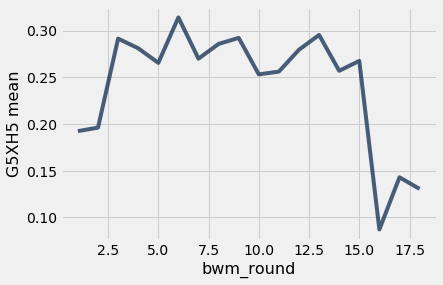

In [223]:
# Plotting for all of the households for their WG use
BWM_Main_WG_Means.plot('bwm_round')

In [224]:
# Because this sample came from the Main RWP sample half of the households had been promoted WG
# WG in the treament arm had been promoted with free samples, encouragement scripts, and follow-up
# Assignment = 0 is a control household with no WG Promotion
# Assigment = 1 is a household with WG Promotion

BWM_Main_WG_Assign = BWM_Household_table.select('bwm_round','G5XH5','assign_wg').where('bwm_round', are.below(20))
#BWM_Main_WG_Assign

In [225]:
BWM_Main_WG_Assign
BWM_Main_WG_Assign.pivot('bwm_round','assign_wg')

assign_wg,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,82,78,75,78,84,80,84,80,81,85,86,84,76,75,78,82,75,83
nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,74,75,76,75,78,76,79,74,73,77,78,77,73,69,77,78,65,77
nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [226]:
#  Oops there are nans in here to strip out

assign_wg_array=BWM_Main_WG_Assign.column('assign_wg')
BWM_Main_WG_Assign.append_column('assign_wg_nonan',np.nan_to_num(assign_wg_array))
BWM_Main_WG_Assign.pivot('bwm_round','assign_wg_nonan')

assign_wg_nonan,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,82,78,75,78,84,80,84,80,81,85,86,84,76,75,80,83,75,84
1,74,75,76,75,78,76,79,74,73,77,78,77,73,69,77,78,65,77


WG Use in Control Group
WG Use in Treatment Group


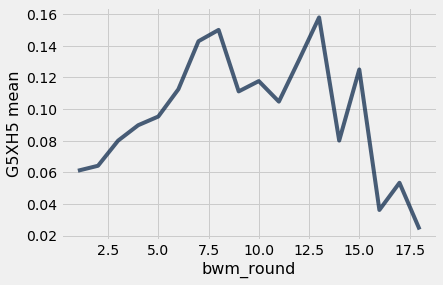

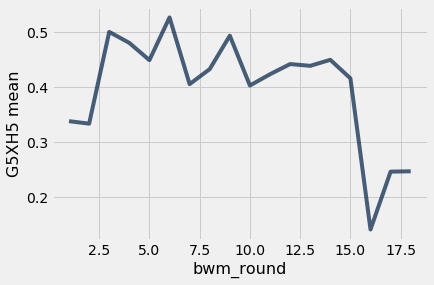

In [227]:
BWM_Main_WG_Means_Assign0=BWM_Main_WG_Assign.where('assign_wg_nonan',0).group('bwm_round',np.mean)

BWM_Main_WG_Means_Assign1=BWM_Main_WG_Assign.where('assign_wg_nonan',1).group('bwm_round',np.mean)

print ("WG Use in Control Group")
BWM_Main_WG_Means_Assign0.select('bwm_round','G5XH5 mean').plot('bwm_round')
print ("WG Use in Treatment Group")
BWM_Main_WG_Means_Assign1.select('bwm_round','G5XH5 mean').plot('bwm_round')

Unfortunately in the above two graphs the vertical scales are different so it is hard to see the effect, and hard to compare.  Lets make a graph with both lines on the same axis.

In [228]:
# Make a short table with Treatment outcomes
BWM_Main_WG_Means_Assign1_short=BWM_Main_WG_Means_Assign1.select('G5XH5 mean')
BWM_Main_WG_Means_Assign1_short.relabel('G5XH5 mean','ValidatedCL_WGPromotion')

ValidatedCL_WGPromotion
0.337838
0.333333
0.5
0.48
0.448718
0.526316
0.405063
0.432432
0.493151
0.402597


In [229]:
# Add treatment outcomes to Control Table
BWM_Main_WG_Means_Assign01=BWM_Main_WG_Means_Assign0.with_column('ValidatedCL_WGPromotion', BWM_Main_WG_Means_Assign1_short.column('ValidatedCL_WGPromotion'))
# Relabel the Columns
BWM_Main_WG_Means_Assign01.relabel('G5XH5 mean','ValidatedCL_WGcontrol')
BWM_Main_WG_Means_Assign01_graph=BWM_Main_WG_Means_Assign01.select('bwm_round','ValidatedCL_WGcontrol','ValidatedCL_WGPromotion',)

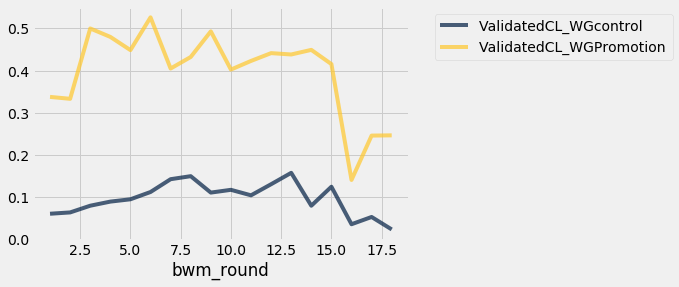

In [230]:
# Graph both Treatment and Control in the same plot
BWM_Main_WG_Means_Assign01_graph.plot('bwm_round')

** Question 3
** Describe the graph above
1) what is the unit of observation
2) what is the sample size
3) What is the outcome and how is it measured
4) what are the two samples compared in this graph?
5) Comment on what is interesting in the graph

write answer here

In [231]:
# What is happening at Round 15?
BWM_dates = BWM_Household_table.select('bwm_round','date_round')
BWM_dates.group('bwm_round',np.min).show()

bwm_round,date_round amin
1,2007-05-07 00:00:00
2,2007-05-21 00:00:00
3,2007-06-04 00:00:00
4,2007-06-18 00:00:00
5,2007-07-02 00:00:00
6,2007-07-16 00:00:00
7,2007-07-30 00:00:00
8,2007-08-13 00:00:00
9,2007-08-28 00:00:00
10,2007-09-12 00:00:00


** Question 4 - What is happening in the dates of the BWM survey rounds? 
1) what happens between round 15 and 16
2) do the dates for 99 and 161 line up?

https://en.wikipedia.org/wiki/2007–08_Kenyan_crisis

write your answer here